<a href="https://colab.research.google.com/github/Suganjustin/Suganjustin/blob/main/Predicting%20customer%20buying%20behaviour%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [11]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [12]:
df["flight_day"].unique()

array([nan])

In [13]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,0.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,NaN,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,NaN,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,NaN,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,NaN,1.000000,1.000000,1.000000,9.500000,1.000000


In [14]:
is_weekend = []

for i in range(len(df)):
    if df['flight_day'][i] == 6 or df['flight_day'][i] == 7:
        is_weekend.append(1)
    else:
        is_weekend.append(0)

df['is_weekend'] = is_weekend
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend
0,2,Internet,RoundTrip,262,19,7,NaN,AKLDEL,New Zealand,1,0,0,5.52,0,0
1,1,Internet,RoundTrip,112,20,3,NaN,AKLDEL,New Zealand,0,0,0,5.52,0,0
2,2,Internet,RoundTrip,243,22,17,NaN,AKLDEL,India,1,1,0,5.52,0,0
3,1,Internet,RoundTrip,96,31,4,NaN,AKLDEL,New Zealand,0,0,1,5.52,0,0
4,2,Internet,RoundTrip,68,22,15,NaN,AKLDEL,India,1,0,1,5.52,0,0


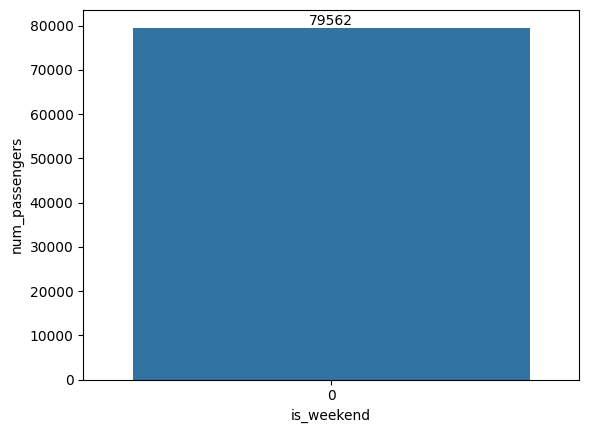

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

weekend = df.groupby('is_weekend')['num_passengers'].sum().reset_index()
ax = sns.barplot(data = weekend, x= 'is_weekend', y= 'num_passengers')
ax.bar_label(ax.containers[0])
plt.show()

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

dayperday = df.groupby('flight_day')['num_passengers'].mean().reset_index()

# Check if the DataFrame is empty and print a message if so
if dayperday.empty:
    print("Warning: dayperday DataFrame is empty. No bars to plot.")
else:
    ax = sns.barplot(data = dayperday, x= 'flight_day', y= 'num_passengers')
    for bar in ax.patches:
        bar.set_facecolor('#888888')

    ax.bar_label(ax.containers[0]) # This line should now work if there are bars
    plt.ylim(0,2)
    ax.patches[5].set_facecolor('#aa3333')
    ax.patches[6].set_facecolor('#aa3333')
    plt.show()

In [24]:
df['flight_day'].value_counts().reset_index().columns

Index(['flight_day', 'count'], dtype='object')

In [25]:
route = df[df['is_weekend'] == 1].groupby('route').agg({'num_passengers' : 'sum'}).reset_index().sort_values(by='num_passengers', ascending=False)

In [27]:
route[:5]

,route,num_passengers


In [28]:
# df.drop('flight_day',axis=1, inplace=True)

In [29]:
df['route'].value_counts()

,count
route,
AKLKUL,2680
PENTPE,924
MELSGN,842
ICNSIN,801
DMKKIX,744
...,...
LBUTPE,1
CXRMEL,1
DELKBR,1


In [30]:
df.drop('route',axis=1, inplace=True)

In [31]:
df['booking_origin'].value_counts()

,count
booking_origin,
Australia,17872
Malaysia,7174
South Korea,4559
Japan,3885
China,3387
...,...
Panama,1
Tonga,1
Tanzania,1


In [34]:
!pip install pycountry_convert
import pycountry_convert as pc

continent = []
index = []

df['booking_origin'] =  df['booking_origin'].replace('Myanmar (Burma)', 'Myanmar')

for i in range(len(df)):
    country = df['booking_origin'][i]
    #print(country)
    try :
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        continent.append(continent_name)
    except:
        continent.append('Others')

df['booking_continent'] = continent

In [35]:
df['booking_continent'].value_counts()

,count
booking_continent,
AS,29740
OC,18960
EU,578
NA,525
Others,87
AF,69
SA,41


In [36]:
df.drop('booking_origin',axis=1, inplace=True)

In [37]:
df.sample()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continent
17221,1,Internet,RoundTrip,222,68,17,NaN,1,0,0,4.67,0,0,AS


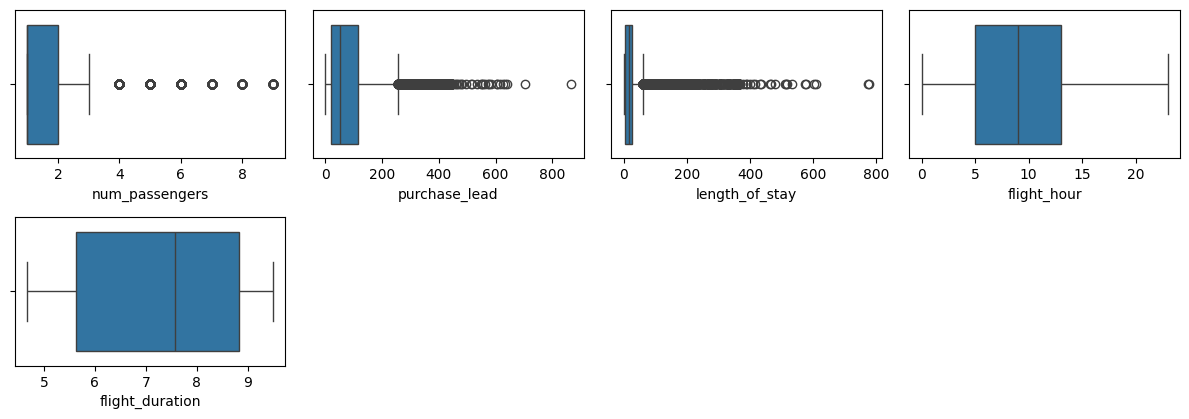

In [38]:
num = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.boxplot(data=df[num], x=df[column])
    plt.tight_layout()

In [42]:
from scipy import stats
import numpy as np

print(f'Total rows before delete outlier : {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in num:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    df = df[filtered_entries]

print(f'Total rows after delete outlier : {len(df)}')

Total rows before delete outlier : 41871
Total rows after delete outlier : 40988


<ipython-input-42-8deed01acf67>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]
<ipython-input-42-8deed01acf67>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]
<ipython-input-42-8deed01acf67>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]


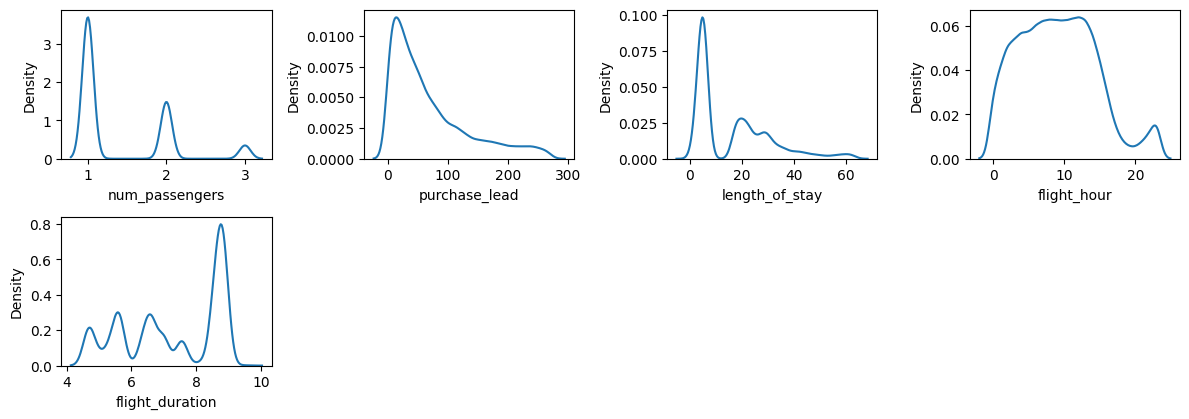

In [43]:
plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.kdeplot(data=df[num], x=df[column])
    plt.tight_layout()

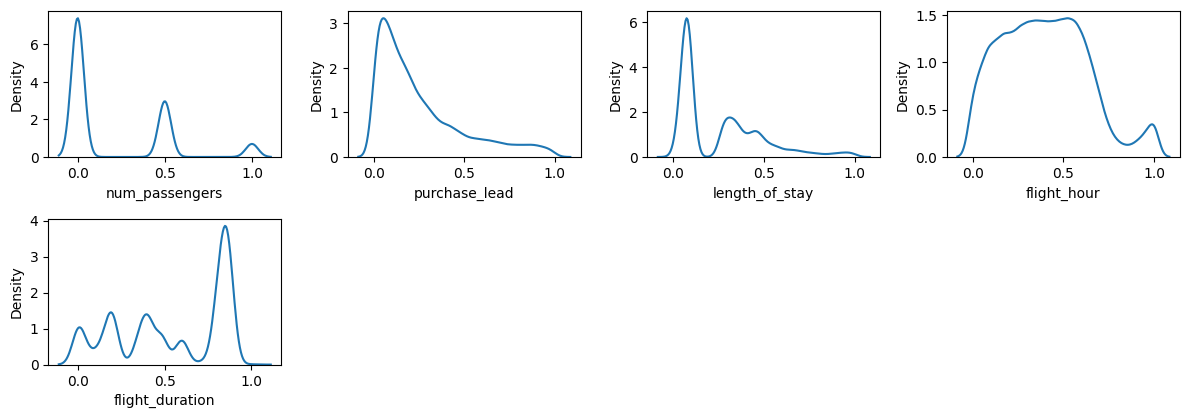

In [44]:
from sklearn.preprocessing import Normalizer

num_max = df[num].max()
num_min = df[num].min()

num_features = (df[num] - num_min) / (num_max - num_min)
num_features.head()

df[num] = num_features

plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.kdeplot(data=df, x=df[column])
    plt.tight_layout()

In [45]:
from sklearn import preprocessing

label_encode = ['sales_channel']
one_hot = ['booking_continent']

mapping_trip_type = {
    'RoundTrip'  : 0,
    'OneWay'     : 1,
    'CircleTrip' : 2
}

df['trip_type'] = df['trip_type'].map(mapping_trip_type)

df['sales_channel'] = preprocessing.LabelEncoder().fit_transform(df['sales_channel'])

onehots = pd.get_dummies(df['booking_continent'], prefix='booking_continent')
df = df.join(onehots)

df.drop('booking_continent', axis=1, inplace=True)


In [46]:
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continent_AF,booking_continent_AS,booking_continent_EU,booking_continent_NA,booking_continent_OC,booking_continent_Others,booking_continent_SA
0,0.5,0,0,0.966790,0.301587,0.304348,NaN,1,0,0,0.175983,0,0,False,False,False,False,True,False,False
1,0.0,0,0,0.413284,0.317460,0.130435,NaN,0,0,0,0.175983,0,0,False,False,False,False,True,False,False
2,0.5,0,0,0.896679,0.349206,0.739130,NaN,1,1,0,0.175983,0,0,False,True,False,False,False,False,False
3,0.0,0,0,0.354244,0.492063,0.173913,NaN,0,0,1,0.175983,0,0,False,False,False,False,True,False,False
4,0.5,0,0,0.250923,0.349206,0.652174,NaN,1,0,1,0.175983,0,0,False,True,False,False,False,False,False


In [47]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['booking_complete'], axis=1)
y = df['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
y_train.value_counts(normalize=True)

,proportion
booking_complete,
0,0.852516
1,0.147484


In [54]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Impute missing values and update x_train and x_test DataFrames
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Check for column differences before and after imputation
print("Columns in original x_train:", x_train.columns)
print("Columns in imputed x_train:", imputer.get_feature_names_out())

# Recreate DataFrames, handling potential column mismatches
x_train = pd.DataFrame(x_train_imputed, columns=imputer.get_feature_names_out())
x_test = pd.DataFrame(x_test_imputed, columns=imputer.get_feature_names_out())

sm = SMOTE(random_state = 2)
x_over, y_over = sm.fit_resample(x_train, y_train.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['flight_day']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['flight_day']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Columns in original x_train: Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'is_weekend', 'booking_continent_AF', 'booking_continent_AS',
       'booking_continent_EU', 'booking_continent_NA', 'booking_continent_OC',
       'booking_continent_Others', 'booking_continent_SA'],
      dtype='object')
Columns in imputed x_train: ['num_passengers' 'sales_channel' 'trip_type' 'purchase_lead'
 'length_of_stay' 'flight_hour' 'wants_extra_baggage'
 'wants_preferred_seat' 'wants_in_flight_meals' 'flight_duration'
 'is_weekend' 'booking_continent_AF' 'booking_continent_AS'
 'booking_continent_EU' 'booking_continent_NA' 'booking_continent_OC'
 'booking_continent_Others' 'booking_continent_SA']


In [55]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def confusionmatrix(predictions):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_over)


    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_over, y_pred_train))

Accuracy (Test Set): 0.84
Precision (Test Set): 0.38
Recall (Test Set): 0.04
F1-Score (Test Set): 0.08
roc_auc (test-proba): 0.51
roc_auc (train-proba): 0.54


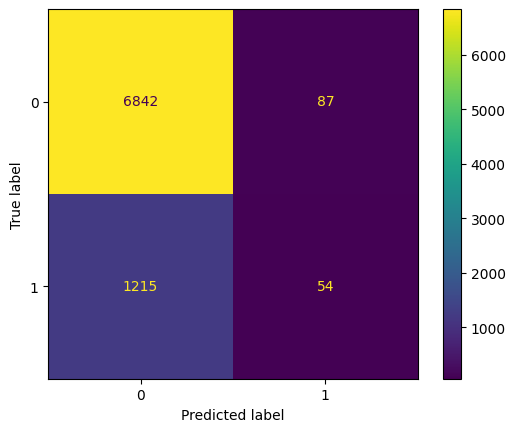

In [56]:
import xgboost as xgb

clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)

predictions = clf.predict(x_test)
confusionmatrix(predictions)
eval_classification(clf)

In [58]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(x_over, y_over)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.29
Recall (Test Set): 0.22
F1-Score (Test Set): 0.25
roc_auc (test-proba): 0.56
roc_auc (train-proba): 0.99


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      6929
           1       0.29      0.22      0.25      1269

    accuracy                           0.80      8198
   macro avg       0.58      0.56      0.57      8198
weighted avg       0.77      0.80      0.78      8198



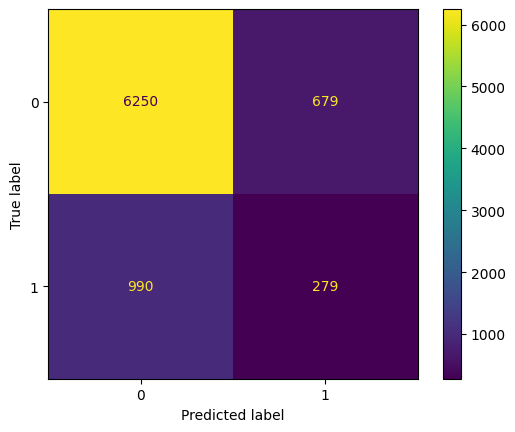

In [59]:
predictions = xg_tuned.predict(x_test)
confusionmatrix(predictions)
print(classification_report(y_test, predictions))

<Axes: >

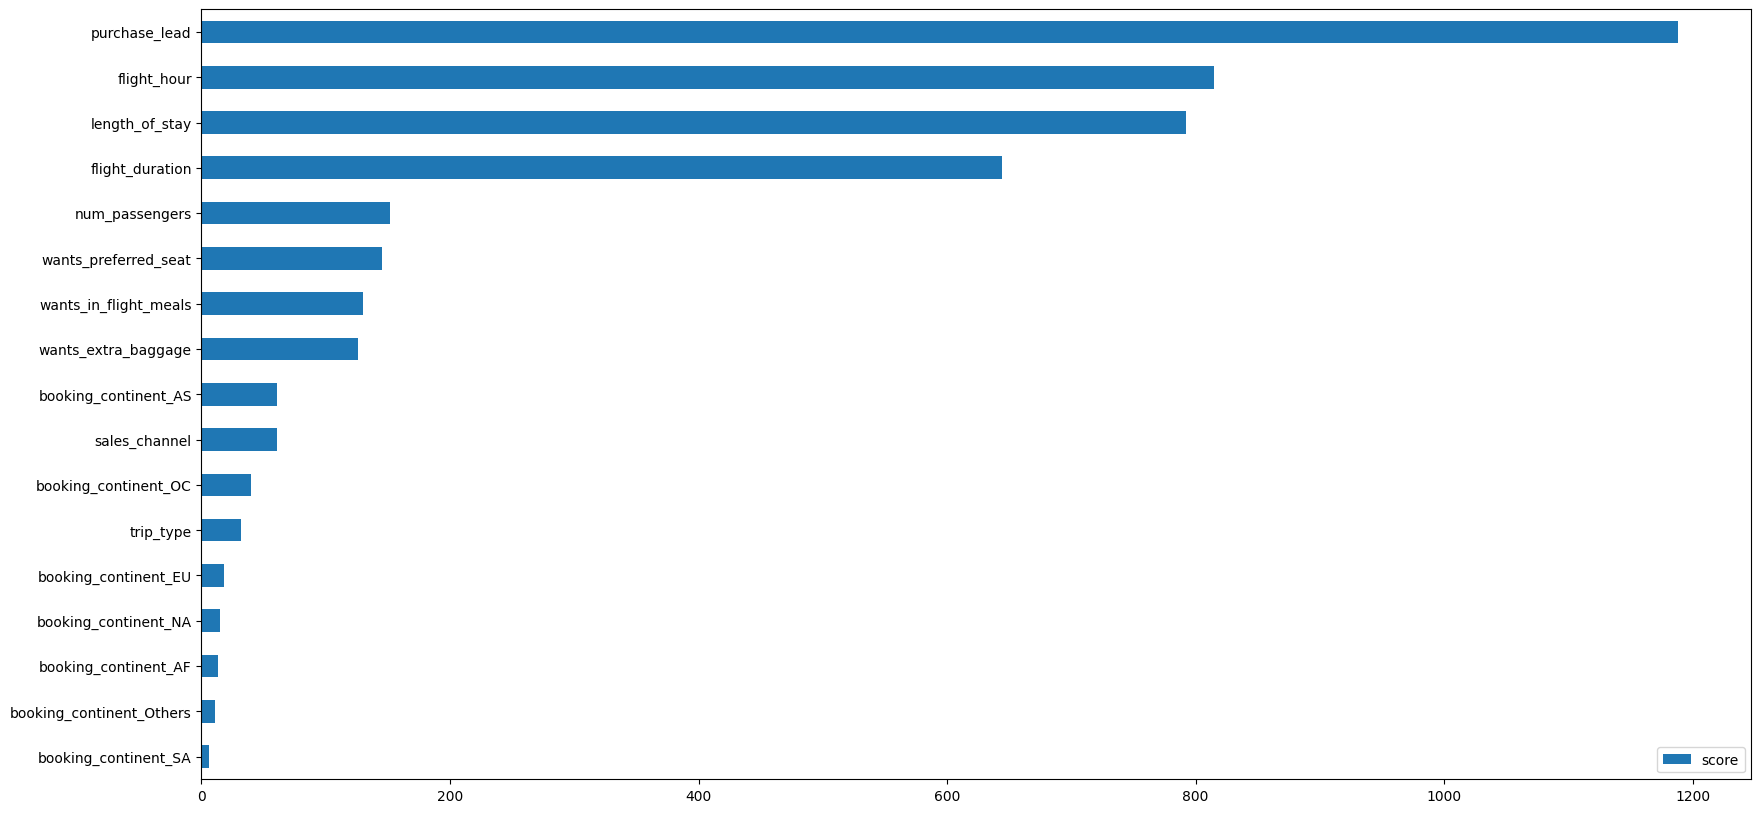

In [60]:
feature_important = clf.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.nlargest(40, columns="score").sort_values(by = "score", ascending=True).plot(kind='barh', figsize = (20,10)) ## plot top 40 features